In [475]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, auc, roc_curve, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import statsmodels.formula.api as smf
import statistics
from scipy import stats


In [476]:
file_path = r'C:\Users\Kristina Vrdoljak\Desktop\AppCogSci\PROJEKT\anonymisedData\assessments.csv'
assessments = pd.read_csv(file_path)
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


Assessment_ID: Unique identifier for each assessment.

Code_Module: ID of the course associated with the assessment.

Assessment_Type: Type of assessment (e.g., tutor marked assessment, computer marked assessment, final exam).

Date: Date of the assessment.

Weight: Weight or contribution of the assessment to the overall course grade.

In [477]:
print(assessments.head())


  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
3         AAA             2013J           1755             TMA  166.0    20.0
4         AAA             2013J           1756             TMA  215.0    30.0


In [478]:
print(assessments.describe())

       id_assessment        date      weight
count     206.000000  195.000000  206.000000
mean    26473.975728  145.005128   20.873786
std     10098.625521   76.001119   30.384224
min      1752.000000   12.000000    0.000000
25%     15023.250000   71.000000    0.000000
50%     25364.500000  152.000000   12.500000
75%     34891.750000  222.000000   24.250000
max     40088.000000  261.000000  100.000000


In [479]:
 # search for missing values, d types
assessments.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [480]:
# what is the most common value?
mode_date = assessments['date'].mode()
print("Most Frequent Date:", mode_date)

Most Frequent Date: 0    222.0
Name: date, dtype: float64


In [481]:
#What is the average date
mean_date = assessments['date'].mean()
print("Average Date:", mean_date)

Average Date: 145.00512820512822


In [482]:
# Replace NaN values in the 'date' column with the average date
assessments['date'].fillna(mean_date, inplace=True)

In [483]:
assessments.isna().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

Data visualization

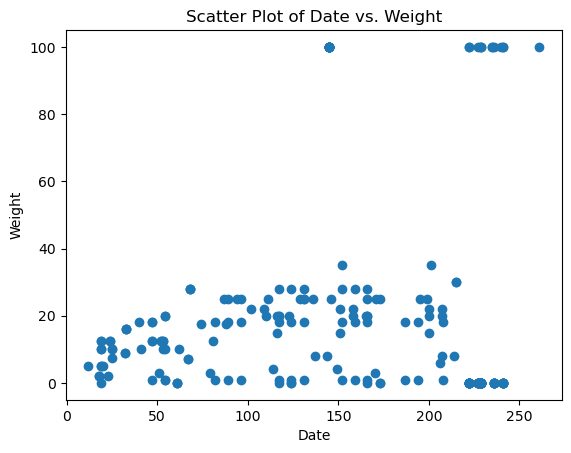

In [484]:
plt.scatter(assessments['date'], assessments['weight'])
plt.xlabel('Date')
plt.ylabel('Weight')
plt.title('Scatter Plot of Date vs. Weight')
plt.show()

Outliers might be there because a small percentage of people finishes the courese as said in the article. "Studies show normally only 5% to 15% of the students who have registred for a MOOC finally compelte it."

_________________________________________________________________________________________________________________________________

In [485]:
file_path = r'C:\Users\Kristina Vrdoljak\Desktop\AppCogSci\PROJEKT\anonymisedData\courses.csv'
courses = pd.read_csv (file_path)
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [486]:
print(courses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 660.0+ bytes
None


_______________________________________________________________________________________________________________________________

In [487]:
file_path = r'C:\Users\Kristina Vrdoljak\Desktop\AppCogSci\PROJEKT\anonymisedData\studentAssessment.csv'
student_assessment = pd.read_csv (file_path)
student_assessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [488]:
print(student_assessment.describe())

       id_assessment    id_student  date_submitted      is_banked  \
count  173912.000000  1.739120e+05   173912.000000  173912.000000   
mean    26553.803556  7.051507e+05      116.032942       0.010977   
std      8829.784254  5.523952e+05       71.484148       0.104194   
min      1752.000000  6.516000e+03      -11.000000       0.000000   
25%     15022.000000  5.044290e+05       51.000000       0.000000   
50%     25359.000000  5.852080e+05      116.000000       0.000000   
75%     34883.000000  6.344980e+05      173.000000       0.000000   
max     37443.000000  2.698588e+06      608.000000       1.000000   

               score  
count  173739.000000  
mean       75.799573  
std        18.798107  
min         0.000000  
25%        65.000000  
50%        80.000000  
75%        90.000000  
max       100.000000  


In [489]:
student_assessment.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [490]:
unique_values_score = student_assessment['score'].unique()
unique_values_score

array([ 78.,  70.,  72.,  69.,  79.,  71.,  68.,  73.,  67.,  83.,  66.,
        59.,  82.,  60.,  75.,  74.,  62.,  63.,  84.,  80.,  76.,  85.,
        57.,  81.,  87.,  77.,  45.,  65.,  61.,  52.,  54.,  51.,  88.,
        58.,  64.,  55.,  38.,  91.,  47.,  89.,  36.,  86.,  49.,  53.,
        39.,  nan,  90.,  50.,  56.,  30.,  11.,  40.,  94.,  48.,  46.,
        25.,  34.,  42.,  18.,  37.,  28.,  33.,  95.,  35.,  44.,  41.,
        15.,   0.,  43.,  93.,  32.,  92.,  98.,  24.,  19.,  27.,  29.,
        20.,  97.,  23.,  99., 100.,  10.,   5.,  13.,  26.,  22.,   8.,
        12.,  16.,   9.,  96.,  14.,  21.,  17.,  31.,   6.,   1.,   7.,
         4.,   2.,   3.])

In [491]:
#173 missing score values  
(173/173912) *100

0.09947559685358112

In [492]:
#A very small percentage of values is missing. I decided to replace those values with an average number. 

average_score = student_assessment['score'].mean()

student_assessment['score'].fillna(average_score, inplace=True)

In [493]:
student_assessment.isna().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

In [494]:
unique_values_is_banked = student_assessment['is_banked'].unique()
unique_values_is_banked

array([0, 1], dtype=int64)

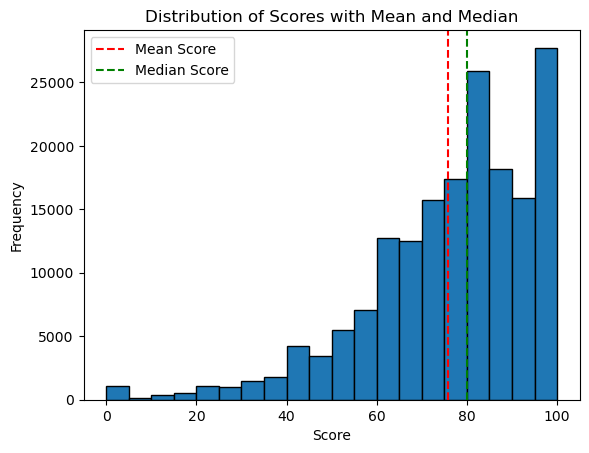

In [495]:
#drawing a histogram to see distribution of values for "score"

plt.hist(student_assessment['score'], bins=20, edgecolor='black')  # Adjust the number of bins as needed

# Calculate mean and median values
mean_score = student_assessment['score'].mean()
median_score = student_assessment['score'].median()

# Plot mean and median lines
plt.axvline(x=mean_score, color='r', linestyle='--', label='Mean Score')
plt.axvline(x=median_score, color='g', linestyle='--', label='Median Score')

plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores with Mean and Median')
plt.legend()
plt.show()


_______________________________________________________________________________________________________________________________

In [496]:
file_path = r'C:\Users\Kristina Vrdoljak\Desktop\AppCogSci\PROJEKT\anonymisedData\studentInfo.csv'
student_info = pd.read_csv(file_path) 
student_info

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [497]:
student_info.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [498]:
#Članak ne navodi značenje stupca imd_band. Možda postoji neka druga namjena za njega. U svakom slučaju, stupac ne koriste u analizi.

In [499]:
# disability column se koristi u testu korelacije, stoga ću ga pretvoriti u numeričke vrijednosti
student_info['disability_encoded'] = student_info['disability'].replace({'Y': 1, 'N': 0})
#show update
student_info

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,disability_encoded
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,1
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,0
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,1
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,0


In [500]:
student_info['disability_encoded'] = student_info['disability'].replace({'Y': 1, 'N': 0})
student_info

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,disability_encoded
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,1
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,0
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,1
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,0


In [501]:
print(student_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
 12  disability_encoded    32593 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [502]:
student_info.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
disability_encoded         0
dtype: int64

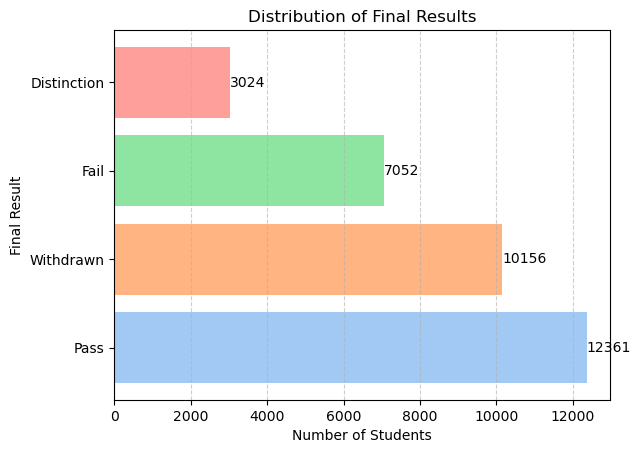

In [503]:
final_result_counts = student_info['final_result'].value_counts()

colors = sns.color_palette('pastel')

# Plotting the horizontal bar chart with different colors and a grid
plt.barh(final_result_counts.index, final_result_counts.values, color=colors)
plt.xlabel('Number of Students')
plt.ylabel('Final Result')
plt.title('Distribution of Final Results')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adding annotations for the exact counts at the ends of the bars
for index, value in enumerate(final_result_counts.values):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.show()


In [504]:
final_result_counts = student_info['final_result'].value_counts()

total_students = len(student_info)

#  the number of students who passed (Pass and Distinction)
pass_students = final_result_counts.loc[['Pass', 'Distinction']].sum()

# percentage of students who passed
pass_percentage = (pass_students / total_students) * 100

# the result
print("Number of Students who Passed the Test (Pass and Distinction):", pass_students)
print("Percentage of Students who Passed the Test (Pass and Distinction): {:.2f}%".format(pass_percentage))


Number of Students who Passed the Test (Pass and Distinction): 15385
Percentage of Students who Passed the Test (Pass and Distinction): 47.20%


In [505]:
unique_values_gender = student_info['gender'].unique()

# Display the unique values
print("Unique Values in 'gender' column:", unique_values_gender)

Unique Values in 'gender' column: ['M' 'F']


In [506]:
gender_counts = student_info['gender'].value_counts()

# percentage of each gender
gender_percentages = (gender_counts / len(student_info)) * 100

# the result
print("Gender Percentages:")
print(gender_percentages)

Gender Percentages:
gender
M    54.843064
F    45.156936
Name: count, dtype: float64


In [507]:
# using the same principle for gender --> mapping into numerical values for easier use later
gender_mapping = { "M": 0, "F": 1}

student_info["gender_encoded"] = student_info["gender"].map(gender_mapping)
# Displaying the modified DataFrame
student_info[["gender", "gender_encoded"]]

,gender,gender_encoded
0,M,0
1,F,1
2,F,1
3,F,1
4,F,1
...,...,...
32588,F,1
32589,F,1
32590,F,1
32591,F,1


In [508]:
student_info.drop(("gender"), axis=1, inplace=True)
student_info

,code_module,code_presentation,id_student,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,disability_encoded,gender_encoded
0,AAA,2013J,11391,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0,0
1,AAA,2013J,28400,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,0,1
2,AAA,2013J,30268,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,1,1
3,AAA,2013J,31604,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,0,1
4,AAA,2013J,32885,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,0,1
32589,GGG,2014J,2645731,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,0,1
32590,GGG,2014J,2648187,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,1,1
32591,GGG,2014J,2679821,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,0,1


In [509]:
num_unique_age_values = student_info['age_band'].nunique()

# the result
print("Number of Unique Values in 'age' column:", num_unique_age_values)


Number of Unique Values in 'age' column: 3


In [510]:
# turning "age_band" values to numerical encoding for easier access later
age_band_mapping = {"0-35": 0, "35-55": 1, "55<=": 2}

# applying it
student_info["age_band_encoded"] = student_info["age_band"].map(age_band_mapping)

# modified version
student_info[["age_band", "age_band_encoded"]]

,age_band,age_band_encoded
0,55<=,2
1,35-55,1
2,35-55,1
3,35-55,1
4,0-35,0
...,...,...
32588,0-35,0
32589,35-55,1
32590,0-35,0
32591,35-55,1


In [511]:
student_info.drop(("age_band"), axis=1, inplace=True)
student_info

,code_module,code_presentation,id_student,region,highest_education,imd_band,num_of_prev_attempts,studied_credits,disability,final_result,disability_encoded,gender_encoded,age_band_encoded
0,AAA,2013J,11391,East Anglian Region,HE Qualification,90-100%,0,240,N,Pass,0,0,2
1,AAA,2013J,28400,Scotland,HE Qualification,20-30%,0,60,N,Pass,0,1,1
2,AAA,2013J,30268,North Western Region,A Level or Equivalent,30-40%,0,60,Y,Withdrawn,1,1,1
3,AAA,2013J,31604,South East Region,A Level or Equivalent,50-60%,0,60,N,Pass,0,1,1
4,AAA,2013J,32885,West Midlands Region,Lower Than A Level,50-60%,0,60,N,Pass,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,Wales,Lower Than A Level,10-20,0,30,N,Fail,0,1,0
32589,GGG,2014J,2645731,East Anglian Region,Lower Than A Level,40-50%,0,30,N,Distinction,0,1,1
32590,GGG,2014J,2648187,South Region,A Level or Equivalent,20-30%,0,30,Y,Pass,1,1,0
32591,GGG,2014J,2679821,South East Region,Lower Than A Level,90-100%,0,30,N,Withdrawn,0,1,1


In [512]:
student_info["highest_education"].unique()

array(['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level',
       'Post Graduate Qualification', 'No Formal quals'], dtype=object)

In [513]:
education_counts = student_info['highest_education'].value_counts()

# the total number of students
total_students = len(student_info)

#  the percentage of each education level
education_percentages = (education_counts / total_students) * 100

print("Count and Percentage of Each Education Level:")
for education_level, count in education_counts.items():
    percentage = education_percentages[education_level]
    print(f"{education_level}: Count={count}, Percentage={percentage:.2f}%")


Count and Percentage of Each Education Level:
A Level or Equivalent: Count=14045, Percentage=43.09%
Lower Than A Level: Count=13158, Percentage=40.37%
HE Qualification: Count=4730, Percentage=14.51%
No Formal quals: Count=347, Percentage=1.06%
Post Graduate Qualification: Count=313, Percentage=0.96%


In [514]:
#turning levels of education into numerical values for easier access, just like age_band
education_mapping = {"No Formal quals": 0, "Post Graduate Qualification": 1, "Lower Than A Level": 2, "A Level or Equivalent": 3, "HE Qualification": 4}

student_info["highest_education_encoded"] = student_info["highest_education"].map(education_mapping)

student_info

,code_module,code_presentation,id_student,region,highest_education,imd_band,num_of_prev_attempts,studied_credits,disability,final_result,disability_encoded,gender_encoded,age_band_encoded,highest_education_encoded
0,AAA,2013J,11391,East Anglian Region,HE Qualification,90-100%,0,240,N,Pass,0,0,2,4
1,AAA,2013J,28400,Scotland,HE Qualification,20-30%,0,60,N,Pass,0,1,1,4
2,AAA,2013J,30268,North Western Region,A Level or Equivalent,30-40%,0,60,Y,Withdrawn,1,1,1,3
3,AAA,2013J,31604,South East Region,A Level or Equivalent,50-60%,0,60,N,Pass,0,1,1,3
4,AAA,2013J,32885,West Midlands Region,Lower Than A Level,50-60%,0,60,N,Pass,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,Wales,Lower Than A Level,10-20,0,30,N,Fail,0,1,0,2
32589,GGG,2014J,2645731,East Anglian Region,Lower Than A Level,40-50%,0,30,N,Distinction,0,1,1,2
32590,GGG,2014J,2648187,South Region,A Level or Equivalent,20-30%,0,30,Y,Pass,1,1,0,3
32591,GGG,2014J,2679821,South East Region,Lower Than A Level,90-100%,0,30,N,Withdrawn,0,1,1,2


In [515]:
student_info.drop(("highest_education"), axis=1, inplace=True)
student_info

,code_module,code_presentation,id_student,region,imd_band,num_of_prev_attempts,studied_credits,disability,final_result,disability_encoded,gender_encoded,age_band_encoded,highest_education_encoded
0,AAA,2013J,11391,East Anglian Region,90-100%,0,240,N,Pass,0,0,2,4
1,AAA,2013J,28400,Scotland,20-30%,0,60,N,Pass,0,1,1,4
2,AAA,2013J,30268,North Western Region,30-40%,0,60,Y,Withdrawn,1,1,1,3
3,AAA,2013J,31604,South East Region,50-60%,0,60,N,Pass,0,1,1,3
4,AAA,2013J,32885,West Midlands Region,50-60%,0,60,N,Pass,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,Wales,10-20,0,30,N,Fail,0,1,0,2
32589,GGG,2014J,2645731,East Anglian Region,40-50%,0,30,N,Distinction,0,1,1,2
32590,GGG,2014J,2648187,South Region,20-30%,0,30,Y,Pass,1,1,0,3
32591,GGG,2014J,2679821,South East Region,90-100%,0,30,N,Withdrawn,0,1,1,2


In [516]:
student_info["highest_education_encoded"]

0        4
1        4
2        3
3        3
4        2
        ..
32588    2
32589    2
32590    3
32591    2
32592    4
Name: highest_education_encoded, Length: 32593, dtype: int64

________________________________________________________________________________________________________________________________

In [517]:
file_path = r'C:\Users\Kristina Vrdoljak\Desktop\AppCogSci\PROJEKT\anonymisedData\studentRegistration.csv'
student_registration = pd.read_csv(file_path)
student_registration

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


___________________________________________________________________________________________________________________________


In [518]:
file_path = r'C:\Users\Kristina Vrdoljak\Desktop\AppCogSci\PROJEKT\anonymisedData\studentVle.csv'
studentVle = pd.read_csv (file_path)
studentVle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [519]:
studentVle.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

___________________________________________________________________________________________________________________________

In [520]:
file_path = r'C:\Users\Kristina Vrdoljak\Desktop\AppCogSci\PROJEKT\anonymisedData\vle.csv'
vle = pd.read_csv (file_path)
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [521]:
vle.isna().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

___________________________________________________________________________________________________________________________

In [522]:
# Extracting specific columns from each previous Dataframe as they are chosen for correlation analyis in the article
score_column = student_assessment["score"]
highest_education_column = student_info["highest_education_encoded"]
sum_click_column = studentVle["sum_click"]
date_registration_column = student_registration["date_registration"]
age_band_column = student_info["age_band_encoded"]
gender_column = student_info["gender_encoded"]
num_of_prev_attempts_column = student_info["num_of_prev_attempts"]
disability_column = student_info["disability_encoded"]

# Creating a new Dataframe by concatenating the selected columns
merged_df = pd.concat([score_column, highest_education_column, sum_click_column,
                        date_registration_column, age_band_column, gender_column,
                        num_of_prev_attempts_column,disability_column], axis=1)

merged_df

,score,highest_education_encoded,sum_click,date_registration,age_band_encoded,gender_encoded,num_of_prev_attempts,disability_encoded
0,78.0,4.0,4,-159.0,2.0,0.0,0.0,0.0
1,70.0,4.0,1,-53.0,1.0,1.0,0.0,0.0
2,72.0,3.0,1,-92.0,1.0,1.0,0.0,1.0
3,69.0,3.0,11,-52.0,1.0,1.0,0.0,0.0
4,79.0,2.0,1,-176.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10655275,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
10655276,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
10655277,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
10655278,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


In [523]:
#merged_df has too  many rows. They only anylised  32 593 registred studnets. The sum_clicks column is the number of their interactions (clicks on webpages) with the seven courses in the Virtual Learning Enviroment) I will thake those numbers for reshaping this table into an operable one. 

In [524]:
before_index = merged_df.index < 32593
after_index = merged_df.index >= 32593

# Dropping all rows with NaN values after the index in every column (data missing)
final_df= merged_df.dropna(subset=["score", "highest_education_encoded", "sum_click", "date_registration", "age_band_encoded", "gender_encoded", "num_of_prev_attempts", "disability_encoded"], axis=0)

final_df

,score,highest_education_encoded,sum_click,date_registration,age_band_encoded,gender_encoded,num_of_prev_attempts,disability_encoded
0,78.0,4.0,4,-159.0,2.0,0.0,0.0,0.0
1,70.0,4.0,1,-53.0,1.0,1.0,0.0,0.0
2,72.0,3.0,1,-92.0,1.0,1.0,0.0,1.0
3,69.0,3.0,11,-52.0,1.0,1.0,0.0,0.0
4,79.0,2.0,1,-176.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
32588,73.0,2.0,1,-4.0,0.0,1.0,0.0,0.0
32589,81.0,2.0,4,-23.0,1.0,1.0,0.0,0.0
32590,77.0,3.0,5,-129.0,0.0,1.0,0.0,1.0
32591,83.0,2.0,5,-49.0,1.0,1.0,0.0,0.0


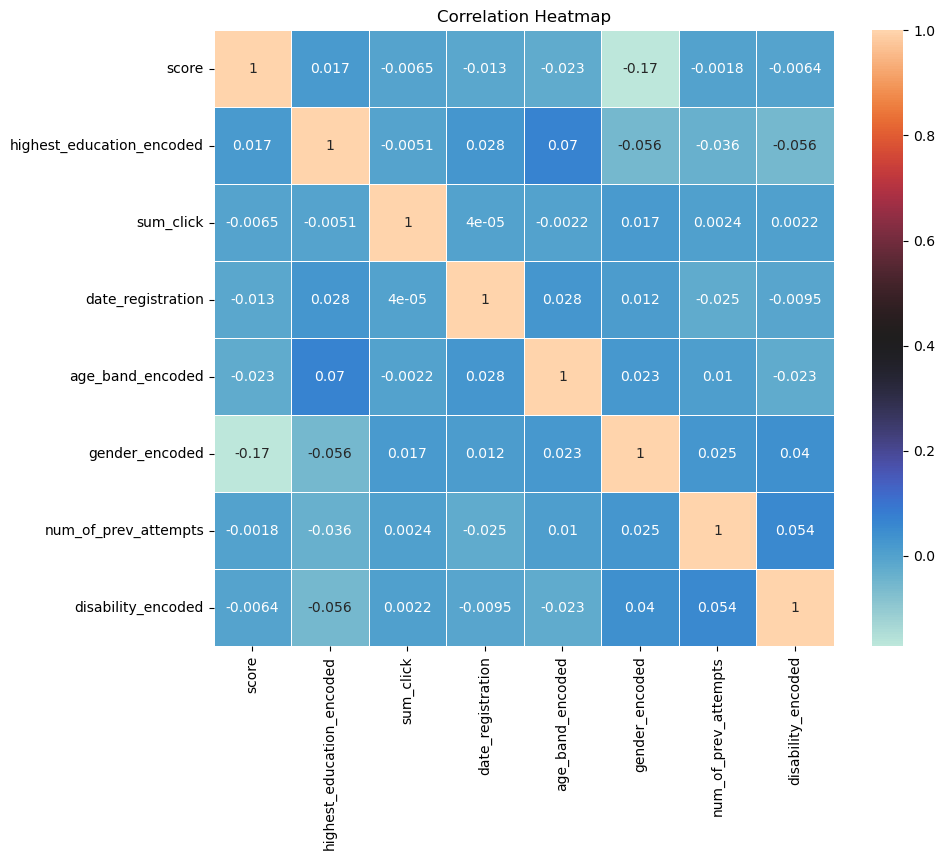

In [525]:
correlation_matrix = final_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="icefire", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()